In [3]:
from pgmpy.models import BayesianModel,BayesianNetwork 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, accuracy_score, mean_squared_error
from pgmpy.factors.discrete import TabularCPD
import bnlearn as bn
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pgmpy'

# Read data

In [10539]:
crash = pd.read_csv('crash_nyc.csv').reset_index().iloc[:,1:]
disable = pd.read_csv('disable_nyc.csv').reset_index().iloc[:,1:]
#crash = crash.loc[(crash['Duration (min)']>=30)&(crash['Duration (min)']<=150)].reset_index()
crash = crash.loc[(crash['Duration (min)']>=30)&(crash['Duration (min)']<=60)].reset_index()
#disable = disable.loc[(disable['Duration (min)']>=30)&(disable['Duration (min)']<=110)].reset_index()
disable = disable.loc[(disable['Duration (min)']>=90)&(disable['Duration (min)']<=120)].reset_index()

#crash['Duration_class']=pd.qcut(crash['Duration (min)'], 43, labels=False)
#disable['Duration_class']=pd.qcut(disable['Duration (min)'], 43, labels=False)
#crash['Duration_class'] = pd.cut(crash['Duration (min)'], [0,30,60,90,120,220], right=True, labels=[1,2,3,4,5])
#disable['Duration_class'] = pd.cut(disable['Duration (min)'], [0,30,60,90,120,220], right=True, labels=[1,2,3,4,5])
# crash['Duration_class'] = pd.cut(crash['Duration (min)'], [0,30,60,220], right=True, labels=[1,2,3])
# disable['Duration_class'] = pd.cut(disable['Duration (min)'], [0,30,60,220], right=True, labels=[1,2,3])

# crash['Duration_class'] = pd.cut(crash['Duration (min)'], [0,30,60,90], right=True, labels=[1,2,3])
# disable['Duration_class'] = pd.cut(disable['Duration (min)'], [0,30,60,90], right=True, labels=[1,2,3])


# crash['Duration_encode'] = LabelEncoder().fit_transform(crash['Duration (min)'])
# disable['Duration_encode'] = LabelEncoder().fit_transform(disable['Duration (min)'])

target_var = 'Duration (min)'

column_clear = ['Start Date Time','Direction','County', 'Year', 'TOD', 'PeakHour',
       'DayofWeek', 'MonthofYear', 'Injury involved', 'Truck involved','Lane Closure Type',
       'Fire involved', target_var]

crash_withtime = copy.deepcopy(crash) #pd.read_csv('crash_nyc.csv').reset_index().iloc[:,1:]
disable_withtime = copy.deepcopy(disable)#pd.read_csv('disable_nyc.csv').reset_index().iloc[:,1:]
# crash_withtime = crash_withtime.loc[(crash_withtime['Duration (min)']<=90)]
# disable_withtime = disable_withtime.loc[(disable_withtime['Duration (min)']<=90)]


crash = crash[column_clear]
disable = disable[column_clear]
#crash
disable

,Start Date Time,Direction,County,Year,TOD,PeakHour,DayofWeek,MonthofYear,Injury involved,Truck involved,Lane Closure Type,Fire involved,Duration (min)
0,2015-01-12 08:56:00,3,3,0,0,1,0,2,0,0,3,1,104.0
1,2015-01-17 12:56:00,1,2,0,0,0,1,2,0,0,1,0,91.0
2,2015-01-18 03:19:00,2,2,0,1,0,1,2,0,0,1,0,99.0
3,2015-01-18 08:03:00,4,3,0,0,1,1,2,0,0,2,0,102.0
4,2015-01-21 07:02:00,2,2,0,0,1,0,2,0,0,1,0,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,2021-12-22 14:03:00,4,0,6,0,0,0,2,0,0,1,0,105.0
1676,2021-12-23 13:58:39,1,2,6,0,0,0,2,0,0,1,0,99.0
1677,2021-12-28 10:35:28,2,2,6,0,0,0,2,0,0,1,0,108.0
1678,2021-12-30 14:29:04,4,0,6,0,0,0,2,0,0,1,0,98.0


# Structure learning

In [10540]:
# from pgmpy.estimators import BDeuScore, K2Score, BicScore, HillClimbSearch,BayesianEstimator

# #----------------
# #One-time model
# #data = crash[crash['Year']==0]#[:1000]

# #----------------

# #----------------
# #CPD model

# crash['Start Date Time'] = pd.to_datetime(crash['Start Date Time'])
# i = 0
# pred_start_0 = pd.Timestamp(2015,1,1,0)
# pred_start_1 = pd.Timestamp(2015,12,31,0)
# pred_start = datelist[result[i]-1]
# pred_end = datelist[result[i+1]-1]
# data = crash[(crash['Start Date Time']>= pred_start)&(crash['Start Date Time']<= pred_end)]

# #----------------

# #----------------
# #Monthly accuracy comparison model


# # crash['Start Date Time'] = pd.to_datetime(crash['Start Date Time'])
# # crash['Month'] = [i.month for i in pd.to_datetime(crash['Start Date Time'])]
# # crash['Year'] = [i.year for i in pd.to_datetime(crash['Start Date Time'])]
# # y = 2020
# # m = 7
# # data = crash[(crash['Year']==y)&(crash['Month']==m)]


# #----------------


# column_year = ['Direction','County', 'TOD', 'PeakHour',
#        'DayofWeek', 'MonthofYear', 'Injury involved', 'Truck involved','Lane Closure Type',
#        'Fire involved', target_var]
# data = data[column_year]


In [10541]:
from pgmpy.estimators import BDeuScore, K2Score, BicScore, HillClimbSearch,BayesianEstimator

#----------------
#One-time model
#data = crash[crash['Year']==0]#[:1000]
#data = disable[disable['Year']==0]

#----------------

#----------------
#CPD model

result1 = [25, 40, 60, 70, 75, 84]
disable['Start Date Time'] = pd.to_datetime(disable['Start Date Time'])
i = 1
pred_start_0 = pd.Timestamp(2015,1,1,0)
pred_start_1 = pd.Timestamp(2015,12,31,0)
pred_start = datelist[result1[i]-1]
pred_end = datelist[result1[i+1]-1]
data = disable[(disable['Start Date Time']>= pred_start)&(disable['Start Date Time']<= pred_end)]

#----------------

#----------------
#Monthly accuracy comparison model


# disable['Start Date Time'] = pd.to_datetime(disable['Start Date Time'])
# disable['Month'] = [i.month for i in pd.to_datetime(disable['Start Date Time'])]
# disable['Year'] = [i.year for i in pd.to_datetime(disable['Start Date Time'])]
# y = 2020
# m = 6
# data = disable[(disable['Year']==y)&(disable['Month']==m)]


#----------------


column_year = ['Direction','County', 'TOD', 'PeakHour',
       'DayofWeek', 'MonthofYear', 'Injury involved', 'Truck involved','Lane Closure Type',
       'Fire involved', target_var]
data = data[column_year]


[bnlearn] >Warning: Computing DAG with 11 nodes can take a very long time!
[bnlearn] >Computing best DAG using [naivebayes]
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


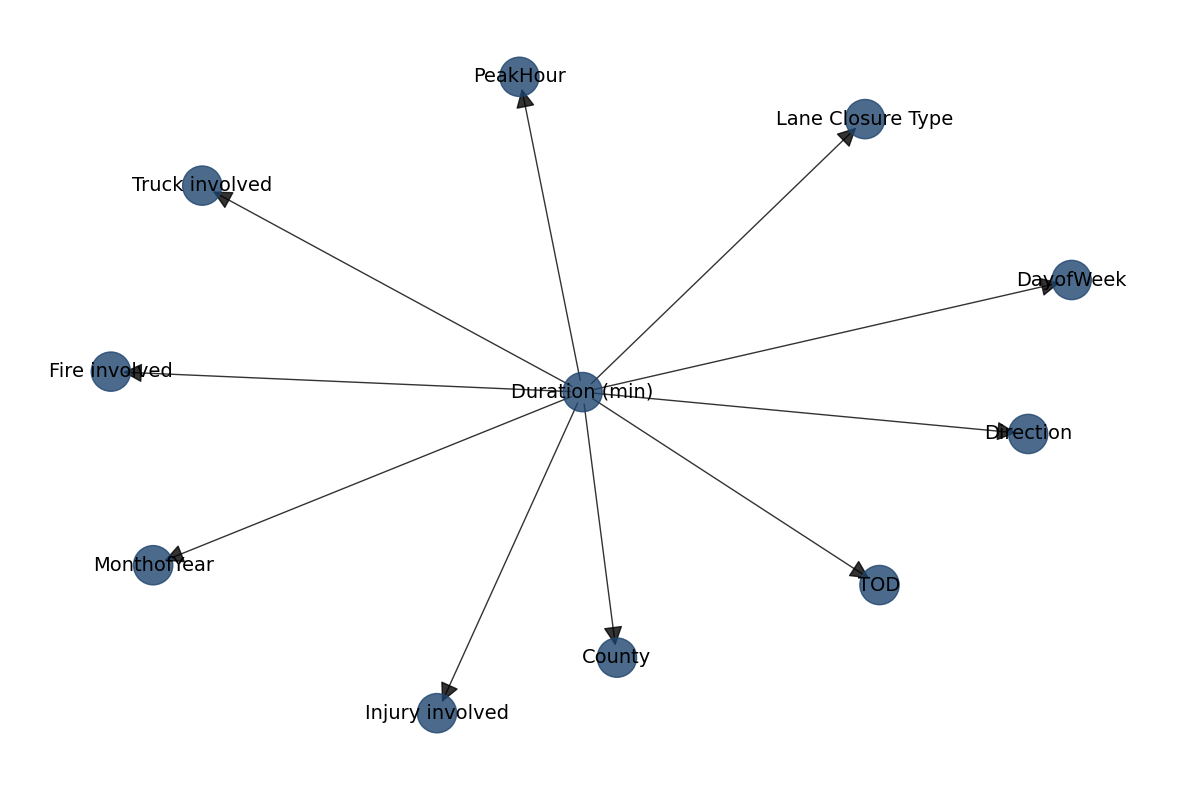

In [10542]:
#DAG = bn.structure_learning.fit(data,methodtype='cl', scoretype='bic')
#DAG = bn.structure_learning.fit(data,methodtype='cl', scoretype='k2')
#DAG = bn.structure_learning.fit(data,methodtype='cl', scoretype='bdeu')
#DAG = bn.structure_learning.fit(data,methodtype='hc', scoretype='bic')
#DAG = bn.structure_learning.fit(data,methodtype='hc', scoretype='k2')
#DAG = bn.structure_learning.fit(data,methodtype='hc', scoretype='bdeu')
DAG = bn.structure_learning.fit(data,methodtype='naivebayes', scoretype='bdeu', root_node='Duration (min)')
#DAG = bn.structure_learning.fit(data,methodtype='tan', scoretype='bic', class_node=target_var)
#DAG = bn.structure_learning.fit(data,methodtype='tan', scoretype='k2', class_node='Duration_class')
#DAG = bn.structure_learning.fit(data,methodtype='tan', scoretype='bdeu', class_node=target_var)
G = bn.plot(DAG)

# Parameter learning

In [10543]:
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator, ExpectationMaximization, IVEstimator

In [10544]:
DAG['model_edges']

[('Duration (min)', 'Direction'),
 ('Duration (min)', 'County'),
 ('Duration (min)', 'TOD'),
 ('Duration (min)', 'PeakHour'),
 ('Duration (min)', 'DayofWeek'),
 ('Duration (min)', 'MonthofYear'),
 ('Duration (min)', 'Injury involved'),
 ('Duration (min)', 'Truck involved'),
 ('Duration (min)', 'Lane Closure Type'),
 ('Duration (min)', 'Fire involved')]

In [10545]:
model_struct = BayesianNetwork(ebunch=DAG['model_edges'])
model_struct.nodes()

NodeView(('Duration (min)', 'Direction', 'County', 'TOD', 'PeakHour', 'DayofWeek', 'MonthofYear', 'Injury involved', 'Truck involved', 'Lane Closure Type', 'Fire involved'))

In [10546]:
mle = MaximumLikelihoodEstimator(model=model_struct, data = data)

model_struct.fit(data, estimator=BayesianEstimator, prior_type='BDeu',equivalent_sample_size=10,
          complete_samples_only=False)
#model_struct.fit(data, estimator=MaximumLikelihoodEstimator)
model_struct.local_independencies(mle.variables)

(Direction ⟂ Fire involved, MonthofYear, Lane Closure Type, County, TOD, Injury involved, PeakHour, Truck involved, DayofWeek | Duration (min))
(County ⟂ Fire involved, MonthofYear, Lane Closure Type, TOD, Injury involved, PeakHour, Truck involved, Direction, DayofWeek | Duration (min))
(TOD ⟂ Fire involved, MonthofYear, Lane Closure Type, County, Injury involved, PeakHour, Truck involved, Direction, DayofWeek | Duration (min))
(PeakHour ⟂ Fire involved, MonthofYear, County, TOD, Injury involved, Lane Closure Type, Truck involved, Direction, DayofWeek | Duration (min))
(DayofWeek ⟂ Fire involved, MonthofYear, County, TOD, Injury involved, PeakHour, Truck involved, Direction, Lane Closure Type | Duration (min))
(MonthofYear ⟂ Fire involved, Lane Closure Type, County, TOD, Injury involved, PeakHour, Truck involved, Direction, DayofWeek | Duration (min))
(Injury involved ⟂ Fire involved, MonthofYear, Lane Closure Type, County, TOD, PeakHour, Truck involved, Direction, DayofWeek | Duration

In [10547]:
# crash['Year'] = [i.year for i in pd.to_datetime(crash['Start Date Time'])]
# test = crash[crash['Year']==2020].reset_index().iloc[:,1:]
# test['Month'] = [i.month for i in pd.to_datetime(test['Start Date Time'])]

# test = test[test['Month']==8]
# #test = crash[crash['Year']==5][2000:3000].reset_index().iloc[:,1:]
# test = test[column_year]
# test

# pred_test = model_struct.predict(test.iloc[:,:-1]-1)

In [10548]:
disable['Year'] = [i.year for i in pd.to_datetime(disable['Start Date Time'])]
test = disable[disable['Year']==2020].reset_index().iloc[:,1:]
test['Month'] = [i.month for i in pd.to_datetime(test['Start Date Time'])]

test = test[test['Month']==12]
#test = crash[crash['Year']==5][2000:3000].reset_index().iloc[:,1:]
test = test[column_year]
test

pred_test = model_struct.predict(test.iloc[:,:-1]-1)

  0%|          | 0/21 [00:00<?, ?it/s]

In [10549]:
mae_test = mean_absolute_error(pred_test[target_var], test[target_var])
mae_test
mape_test = mean_absolute_percentage_error(pred_test[target_var], test[target_var])
print(mape_test)
rmse_test = np.sqrt(mean_squared_error(pred_test[target_var], test[target_var]))
print(rmse_test)

0.09534133110760816
13.080021273749486


In [10550]:
#acc_test = accuracy_score(pred_test[target_var], test[target_var])
#acc_test

In [10551]:
#acc_test
#mae_test
#pred_test['Duration_class'].unique()
#pred_train['Duration_class'].unique()

In [10552]:
# #crash_train = crash.drop('Year', axis=1)
# crash_train = crash[column_year]
# predicted = model_struct.predict(crash_train.iloc[:,:-1]-1)

In [10553]:
# #predict based on each month
# crash['Pred_Duration'] = predicted['Duration (min)']
# #crash['Pred_Score'] = [accuracy_score(i,j) for i,j in zip(list(crash['Duration_class']), predicted)]
# crash['timestamp'] = crash_withtime['Start Date Time']

In [10554]:
disable_train = disable[column_year]
predicted = model_struct.predict(disable_train.iloc[:,:-1])

  0%|          | 0/537 [00:00<?, ?it/s]

In [10555]:
#predict based on each month
disable['Pred_Duration'] = predicted['Duration (min)']
#crash['Pred_Score'] = [accuracy_score(i,j) for i,j in zip(list(crash['Duration_class']), predicted)]
disable['timestamp'] = disable_withtime['Start Date Time']

In [10556]:
#crash['Pred_Duration'].unique()
disable['Pred_Duration'].unique()

array([ 94., 112., 118.,  91., 120., 108., 105.,  90., 114., 100., 103.,
       101., 109.,  96.,  97.,  93.,  95.,  98., 104., 117., 119., 102.,
        92., 106., 111., 113.,  99., 107., 116., 115.])

In [10557]:
# #crash_test = crash[crash['Year']!=0]
# crash_test = copy.deepcopy(crash)
# crash_test['Month'] = [i.month for i in pd.to_datetime(crash_test['timestamp'])]
# acc_overall = []
# rmse_overall = []

# for y in [2015,2016,2017,2018,2019,2020,2021]:
#     for m in np.arange(1,13):
#         obslist = crash_test[(crash_test['Year']==y) & (crash_test['Month']==m)]['Duration (min)']
#         predlist = crash_test[(crash_test['Year']==y) & (crash_test['Month']==m)]['Pred_Duration']
#         acc_overall.append(mean_absolute_percentage_error(obslist, predlist))
#         rmse_overall.append(np.sqrt(mean_squared_error(obslist, predlist)))

In [10558]:
disable_test = copy.deepcopy(disable)
disable_test['Month'] = [i.month for i in pd.to_datetime(disable_test['timestamp'])]
acc_overall = []
rmse_overall = []


for y in [2015,2016,2017,2018,2019,2020]:
    for m in np.arange(1,13):
        obslist = disable_test[(disable_test['Year']==y) & (disable_test['Month']==m)]['Duration (min)']
        predlist = disable_test[(disable_test['Year']==y) & (disable_test['Month']==m)]['Pred_Duration']
        acc_overall.append(mean_absolute_percentage_error(obslist, predlist))
        rmse_overall.append(np.sqrt(mean_squared_error(obslist, predlist)))

In [10559]:
rmse_overall

[15.917400427319668,
 11.263087625386872,
 8.932284942035508,
 10.189383171309474,
 12.841847354577178,
 15.368799562750501,
 13.769104375162447,
 11.753142713179468,
 9.302980949429841,
 11.5,
 9.98570406702931,
 9.578622030334008,
 14.64210723727381,
 8.867714679463004,
 11.022703842524301,
 9.040313751594727,
 12.399596767637245,
 9.88111145754179,
 10.062959698554737,
 12.791855961797271,
 10.308572484426088,
 15.871882896073378,
 11.331372379372237,
 12.587471725666138,
 11.299889379989523,
 13.430733985326915,
 8.82878068710808,
 11.654755824698059,
 13.170102995163925,
 10.455031913279477,
 12.58471294865322,
 13.036386325245683,
 10.83512805646523,
 10.816653826391969,
 10.526157893552615,
 13.025615788386615,
 14.832396974191326,
 14.061373411662967,
 10.932694522568967,
 14.327341947225497,
 8.854377448471462,
 13.207573584879245,
 9.116888013945523,
 12.18703448439404,
 9.092121131323903,
 11.545750206291792,
 12.509996003196804,
 12.073189502443203,
 12.198872898755852,
 8.

In [10560]:
acc_overall

[0.15009924284512424,
 0.08968310907445429,
 0.07151204161392534,
 0.08383390976583141,
 0.10438173707646659,
 0.1296994865486767,
 0.12054572050585483,
 0.09351361588978378,
 0.07944435027193984,
 0.09014853117492043,
 0.08480156945394372,
 0.06973018140810458,
 0.12044743903845355,
 0.06712483748969017,
 0.08029864914612164,
 0.07004425879261619,
 0.09524054228087292,
 0.08124578714482056,
 0.07328105109919718,
 0.10113588097545956,
 0.0869576719703398,
 0.1385010395041982,
 0.08330485395581655,
 0.10038574769911461,
 0.08688762438599731,
 0.10324216092147924,
 0.07708864289527356,
 0.09414641745138978,
 0.10348247080371908,
 0.08575336651154546,
 0.103033216033657,
 0.09779829056864846,
 0.08186899802017997,
 0.08546715895226875,
 0.07513430558652812,
 0.10155046917011397,
 0.11879854805098153,
 0.10871029583119501,
 0.08217124750248403,
 0.1182672336895589,
 0.06696930193406572,
 0.109963297859089,
 0.07140073350394532,
 0.08714140573344888,
 0.06539682564330623,
 0.081066892104895

[0.45301735231674456,
 0.3974477292852961,
 0.5774788715333035,
 0.596608997460696,
 0.5448701571159897,
 0.4124385311856448,
 0.43237634710029715,
 0.47708195964400973,
 0.5203939934930941,
 0.5058485786152886,
 0.4729286111000553,
 0.40985110175785316,
 0.45800181860325034,
 0.4332827026796103,
 0.5677404719360942]

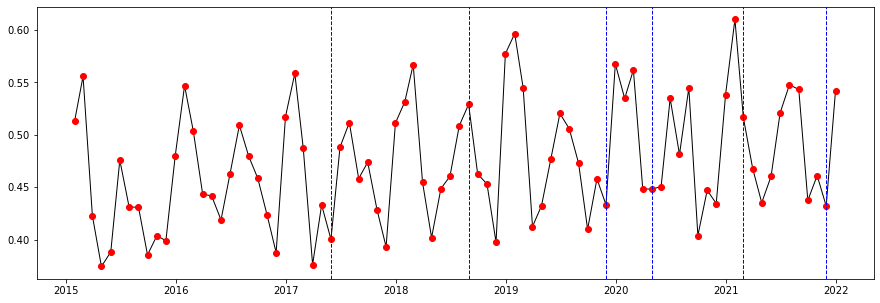

In [2098]:
#plt.plot(acc_overall)#0-12 [:1000]

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
#ax = plt.subplot(111)
ax.plot_date(DurationsByFreq.groups.keys(), acc_overall, '-b', color="black",linewidth=1)
ax.plot_date(DurationsByFreq.groups.keys(), acc_overall, color="red")
#ax.set_ylim(0,0.8)
xcoords = result
for xc in xcoords:
    plt.axvline(x=datelist[xc-2],color='blue', linewidth=1, linestyle='--')
acc_overall[45:60]

[0.22674596021964263,
 0.2589760231054754,
 0.24105058333573287,
 0.21963538101785465,
 0.21710560327490422,
 0.24237483923270403,
 0.24153585408709582,
 0.24072938375836508,
 0.23471415626495845,
 0.23345976733143065,
 0.2351031263673551,
 0.23497898176621637,
 0.2255467158072796,
 0.24907185071887283,
 0.21732178575943184]

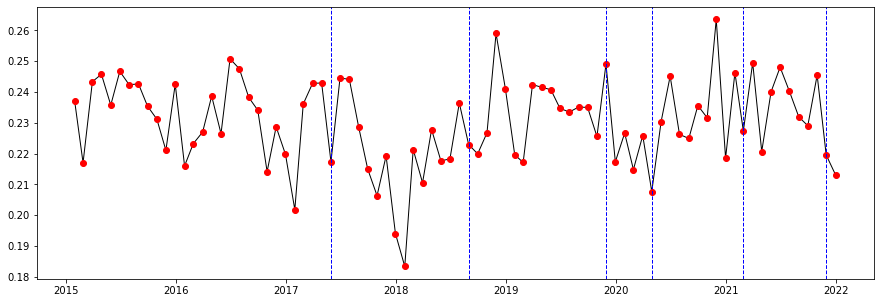

In [2012]:
#plt.plot(acc_overall)#30-45

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
#ax = plt.subplot(111)
ax.plot_date(DurationsByFreq.groups.keys(), acc_overall, '-b', color="black",linewidth=1)
ax.plot_date(DurationsByFreq.groups.keys(), acc_overall, color="red")
#ax.set_ylim(0,0.8)
xcoords = result
for xc in xcoords:
    plt.axvline(x=datelist[xc-2],color='blue', linewidth=1, linestyle='--')
acc_overall[45:60]


[0.22054976571372467,
 0.23201507720779785,
 0.22757542854465526,
 0.23150024073789785,
 0.23377768322976258,
 0.21444986304139188,
 0.2185591561551165,
 0.22500971419757437,
 0.236017647096191,
 0.24492792450688602,
 0.22064438877373554,
 0.21383145586271216,
 0.2120130187269639,
 0.239522483348947,
 0.2379030854944817]

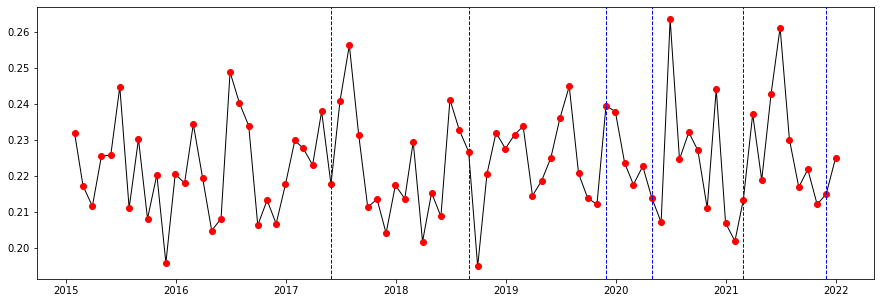

In [2033]:
#plt.plot(acc_overall)#0-45

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
#ax = plt.subplot(111)
ax.plot_date(DurationsByFreq.groups.keys(), acc_overall, '-b', color="black",linewidth=1)
ax.plot_date(DurationsByFreq.groups.keys(), acc_overall, color="red")
#ax.set_ylim(0,0.8)
xcoords = result
for xc in xcoords:
    plt.axvline(x=datelist[xc-2],color='blue', linewidth=1, linestyle='--')
acc_overall[45:60]

In [1950]:
result = [30, 45, 60, 65, 75, 84]
datelist[20]

Timestamp('2016-09-30 00:00:00', freq='M')

# Adaptive training

In [1425]:
i = 1
pred_start = datelist[result[i]-1]
pred_end = datelist[result[i+1]-1]

In [1426]:
crash['timestamp'] = pd.to_datetime(crash['timestamp'])
crash = crash.loc[(crash['Duration (min)']>=30)&(crash['Duration (min)']<=60)].reset_index()
#crash_pretrain = crash[crash['timestamp']<datelist[result[3]-1]]
crash_pretrain = crash[(crash['timestamp']>=pred_start)&(crash['timestamp']<pred_end)].reset_index()


In [1389]:
pred_end

Timestamp('2018-09-30 00:00:00', freq='M')

In [1300]:
crash_adapt['timestamp'] = pd.to_datetime(crash_adapt['timestamp'])
crash['timestamp'] = pd.to_datetime(crash['timestamp'])

In [1301]:
crash_adapt['Pred_Duration_adapt'][(crash_adapt['timestamp']>=pred_start)&(crash_adapt['timestamp']<pred_end)] = crash['Pred_Duration'][(crash['timestamp']>=pred_start)&(crash['timestamp']<pred_end)]

In [1303]:
# crash_adapt['Pred_Duration_adapt'][(crash_adapt['timestamp']>=pred_start)] = crash['Pred_Duration'][(crash['timestamp']>=pred_start)]

In [1222]:
# crash_adapt['Pred_Duration_adapt'][(crash_adapt['timestamp']<pred_start)] = crash['Pred_Duration'][(crash['timestamp']<pred_start)]

In [1306]:
crash_adapt#.to_csv('result_test_replace.csv')

In [1197]:
crash_adapt = copy.deepcopy(crash)
crash_adapt['Pred_Duration_adapt'] = 0
crash_adapt

,Direction,County,Year,TOD,PeakHour,DayofWeek,MonthofYear,Injury involved,Truck involved,Lane Closure Type,Fire involved,Duration_class,Pred_Duration,timestamp,Pred_Duration_adapt
0,3,0,0,1,0,0,2,0,0,3,0,1,1,2015-01-01 01:44:00,0
1,1,2,0,1,0,0,2,0,0,1,0,3,1,2015-01-01 03:01:00,0
2,0,3,0,1,0,0,2,0,0,3,0,4,5,2015-01-01 03:45:00,0
3,3,0,0,1,0,0,2,0,0,2,0,2,1,2015-01-01 04:25:00,0
4,1,1,0,1,0,0,2,0,0,2,0,2,1,2015-01-01 04:29:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48823,1,1,6,0,0,0,2,0,0,1,0,1,1,2021-12-31 13:51:27,0
48824,1,2,6,0,1,0,2,0,0,2,0,1,2,2021-12-31 15:27:59,0
48825,1,2,6,0,1,0,2,0,0,3,0,1,2,2021-12-31 15:31:31,0
48826,3,0,6,0,1,0,2,0,0,2,0,3,1,2021-12-31 16:22:40,0


In [1433]:
crash_adapt_push = pd.read_csv('result_test.csv').iloc[:,1:]
crash_adapt_replace = pd.read_csv('result_test_replace.csv').iloc[:,1:]

In [1434]:
crash_adapt_push

,Direction,County,Year,TOD,PeakHour,DayofWeek,MonthofYear,Injury involved,Truck involved,Lane Closure Type,Fire involved,Duration_class,Pred_Duration,timestamp,Pred_Duration_adapt
0,3,0,0,1,0,0,2,0,0,3,0,1,1,1/1/15 1:44,1
1,1,2,0,1,0,0,2,0,0,1,0,3,1,1/1/15 3:01,1
2,0,3,0,1,0,0,2,0,0,3,0,4,5,1/1/15 3:45,5
3,3,0,0,1,0,0,2,0,0,2,0,2,1,1/1/15 4:25,2
4,1,1,0,1,0,0,2,0,0,2,0,2,1,1/1/15 4:29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48823,1,1,6,0,0,0,2,0,0,1,0,1,1,12/31/21 13:51,1
48824,1,2,6,0,1,0,2,0,0,2,0,1,2,12/31/21 15:27,1
48825,1,2,6,0,1,0,2,0,0,3,0,1,2,12/31/21 15:31,1
48826,3,0,6,0,1,0,2,0,0,2,0,3,1,12/31/21 16:22,3


In [1323]:
#crash_test = crash[crash['Year']!=0]
crash_adapt_test = copy.deepcopy(crash_adapt_push)
crash_adapt_test['Month'] = [i.month for i in pd.to_datetime(crash_test['timestamp'])]
acc_adapt = []

for y in np.arange(0,7):
    for m in np.arange(1,13):
        obslist = crash_adapt_test[(crash_adapt_test['Year']==y) & (crash_adapt_test['Month']==m)]['Duration_class']
        predlist = crash_adapt_test[(crash_adapt_test['Year']==y) & (crash_adapt_test['Month']==m)]['Pred_Duration_adapt']
        acc_adapt.append(accuracy_score(obslist, predlist))

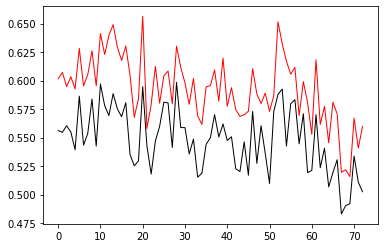

In [1325]:
acc_adapt
acc_overall
plt.plot(np.asarray(acc_overall[11:])+0.14,color="black",linewidth=1)
plt.plot(np.asarray(acc_adapt[11:])+0.17,color="red",linewidth=1)

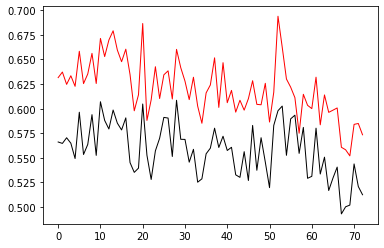

In [1322]:
acc_adapt
acc_overall
plt.plot(np.asarray(acc_overall[11:])+0.15,color="black",linewidth=1)
plt.plot(np.asarray(acc_adapt[11:])+0.2,color="red",linewidth=1)

In [1190]:
acc_diff = abs(np.asarray(acc_adapt)-np.asarray(acc_overall))

In [1326]:
acc_diff.mean()

11.620278253483773

In [10568]:
directory='data/'
#data = np.load(directory+'incident_nyc.npy', allow_pickle=True)
data = pd.read_csv(directory+'incident_nyc.csv')

In [10569]:
isCrash =  [
     'Accident',
     'Accident Road Closed',
     'Accident investigation',
     'Accident with Injuries',
     'Accident with Property Damage',
     'Crash',
     'Crash investigation',
     'Crash with Injuries',
     'Crash with Property Damage'
     
 ]
isDebris = ['Debris spill','Missing Sewer Grate','Gas main break','Roadway non-hazmat spill','Watermain break', 'Falling Debris','Downed pole','Collapsed Sewer Grate','Collapsed Scaffolding','Collapsed Manhole','Fuel spill','Nearby building collapse','Sinkhole','Road Collapse','Steam leak','Downed wires','Fluid Spill','Cargo spill','Hazmat spill','Sewer main break']
isDisabled = ['Disabled vehicle','Vehicle fire','Overturned vehicle','Disabled truck','Disabled bus','Disabled tractor trailer','Misplaced commercial vehicle','Misplaced tractor trailer','Overturned Truck','Overturned tractor trailer','Overheight tractor trailer','Truck fire','Misplaced bus','Jack-knifed tractor trailer','Tractor trailer fire','Bus fire','Vehicle off the roadway','Overturned Dump Truck','Equipment malfunction']
isPolice = ['EMS activity','Fire department activity','Police department activity']
#isPolice = ['Police department activity']
isConstruct = ['Emergency construction']

In [10570]:
data=data.sort_values(by=['Start Date Time'], ignore_index=True)
data['Start Date Time'] = pd.to_datetime(data['Start Date Time'])
#data = data[(data['Duration (min)']>=5) & (data['Duration (min)']<=60)]
data = data.loc[(data['Duration (min)']>=5)]

quantile=0.95
data = data[data['Duration (min)'] < data['Duration (min)'].quantile(quantile)]

data_crash = data[data['Incident Type']==0]
data_debris = data[data['Incident Type']==1]
data_disable = data[data['Incident Type']==2]
data_police = data[data['Incident Type']==3]
data_construct = data[data['Incident Type']==4]


#data = data[data['Year']>=2019]
DurationsByFreq = data.groupby(pd.Grouper(key='Start Date Time', axis=0, freq='1M', sort=True))['Duration (min)']

In [10571]:
def timeseries_analysis_mean(data, type_='all', freq='1M', quantile=1.00):
    if type_=='all':
        Dat = data
    elif type_=='Crash':
        Dat = data[data['Event Type'].str.contains('|'.join(isCrash))]
    elif type_ == 'Debris':
        Dat = data[data['Event Type'].str.contains('|'.join(isDebris))]
    elif type_ == 'Disabled':
        Dat = data[data['Event Type'].str.contains('|'.join(isDisabled))]
    elif type_ == 'Police':
        Dat = data[data['Event Type'].str.contains('|'.join(isPolice))]
    elif type_ == 'Construct':
        Dat = data[data['Event Type'].str.contains('|'.join(isConstruct))]
    else:
        Dat = data[data['Event Type']==type_]
    Dat = Dat[Dat['Duration (min)'] < Dat['Duration (min)'].quantile(quantile)]
    DurationsByFreq = Dat.groupby(pd.Grouper(key='Start Date Time', axis=0, freq=freq, sort=True))['Duration (min)']
    DurationsByFreqFil = DurationsByFreq.apply(lambda x: x[(x<=x.quantile(0.95)) & (x>=x.quantile(0.05))])
    ax = plt.subplot(111)
    ax.bar(DurationsByFreq.groups.keys(), DurationsByFreq.quantile(0.95), width=10, color='blue',alpha=0.5)
    ax.bar(DurationsByFreq.groups.keys(), DurationsByFreq.quantile(0.05), width=10, color='red',alpha=0.5)
    ax.set_ylabel('Monthly duration 95% (red) and 5% (blue) value '+type_)
#     ax.xaxis_date()
    ax2 = ax.twinx()
    ax2.plot_date(DurationsByFreq.groups.keys(), DurationsByFreq.mean(), '-b', color="black",linewidth=1)
    ax2.plot_date(DurationsByFreq.groups.keys(), DurationsByFreq.mean(), color="red")
#     ax2.set_ylim(30, max(DurationsByFreq.mean())+50)
    ax2.set_ylabel('Monthly average duration of '+type_+' (minutes)')
#     ax2.xaxis_date()
    plt.setp(ax.xaxis.get_majorticklabels(),'rotation', 90)
    plt.setp(ax2.xaxis.get_majorticklabels(),'rotation', 90)
    plt.show()
    return DurationsByFreq

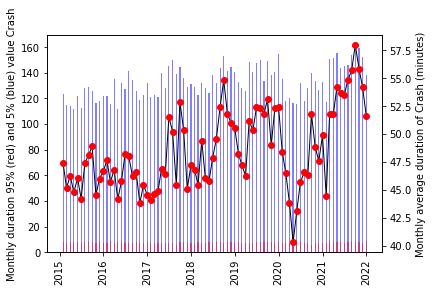

In [972]:
DurationsByFreq = timeseries_analysis_mean(data, 'Crash','1M',quantile=1)
datelist = list(DurationsByFreq.groups.keys())
result = [30, 45, 60, 65, 75, 84]

In [871]:
# model_mle = bn.parameter_learning.fit(DAG, data, methodtype='maximumlikelihood')
# model_bm = bn.parameter_learning.fit(DAG, data, methodtype='bayesianmodel')

In [872]:
# model_bayes = bn.parameter_learning.fit(DAG, data, methodtype='bayes')

In [873]:
# bn_pred_test = bn.predict(model_mle, test, variables=['Duration_class'])
# bn_pred_test

# Base models

In [8525]:
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
from imblearn.over_sampling import SMOTE

In [8574]:
crash = pd.read_csv('crash_nyc.csv').reset_index().iloc[:,1:]
disable = pd.read_csv('disable_nyc.csv').reset_index().iloc[:,1:]
crash = crash.loc[(crash['Duration (min)']>=0)&(crash['Duration (min)']<=150)].reset_index()
#crash = crash.loc[(crash['Duration (min)']>=90)&(crash['Duration (min)']<=120)].reset_index()
#disable = disable.loc[(disable['Duration (min)']>=30)&(disable['Duration (min)']<=110)].reset_index()
#disable = disable.loc[(disable['Duration (min)']>=120)&(disable['Duration (min)']<=150)].reset_index()

#crash['Duration_class']=pd.qcut(crash['Duration (min)'], 43, labels=False)
#disable['Duration_class']=pd.qcut(disable['Duration (min)'], 43, labels=False)
#crash['Duration_class'] = pd.cut(crash['Duration (min)'], [0,30,60,90,120,220], right=True, labels=[1,2,3,4,5])
#disable['Duration_class'] = pd.cut(disable['Duration (min)'], [0,30,60,90,120,220], right=True, labels=[1,2,3,4,5])
# crash['Duration_class'] = pd.cut(crash['Duration (min)'], [0,30,60,220], right=True, labels=[1,2,3])
# disable['Duration_class'] = pd.cut(disable['Duration (min)'], [0,30,60,220], right=True, labels=[1,2,3])

# crash['Duration_class'] = pd.cut(crash['Duration (min)'], [0,30,60,90], right=True, labels=[1,2,3])
# disable['Duration_class'] = pd.cut(disable['Duration (min)'], [0,30,60,90], right=True, labels=[1,2,3])


# crash['Duration_encode'] = LabelEncoder().fit_transform(crash['Duration (min)'])
# disable['Duration_encode'] = LabelEncoder().fit_transform(disable['Duration (min)'])

target_var = 'Duration (min)'

column_clear = ['Start Date Time','Direction','County', 'Year', 'TOD', 'PeakHour',
       'DayofWeek', 'MonthofYear', 'Injury involved', 'Truck involved','Lane Closure Type',
       'Fire involved', target_var]

crash_withtime = copy.deepcopy(crash) #pd.read_csv('crash_nyc.csv').reset_index().iloc[:,1:]
disable_withtime = copy.deepcopy(disable)#pd.read_csv('disable_nyc.csv').reset_index().iloc[:,1:]
# crash_withtime = crash_withtime.loc[(crash_withtime['Duration (min)']<=90)]
# disable_withtime = disable_withtime.loc[(disable_withtime['Duration (min)']<=90)]


crash = crash[column_clear]
disable = disable[column_clear]
crash
#disable

,Start Date Time,Direction,County,Year,TOD,PeakHour,DayofWeek,MonthofYear,Injury involved,Truck involved,Lane Closure Type,Fire involved,Duration (min)
0,2015-01-01 01:44:00,3,0,0,1,0,0,2,0,0,3,0,22.0
1,2015-01-01 03:01:00,1,2,0,1,0,0,2,0,0,1,0,65.0
2,2015-01-01 03:45:00,0,3,0,1,0,0,2,0,0,3,0,110.0
3,2015-01-01 04:25:00,3,0,0,1,0,0,2,0,0,2,0,42.0
4,2015-01-01 04:29:00,1,1,0,1,0,0,2,0,0,2,0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47092,2021-12-31 13:51:27,1,1,6,0,0,0,2,0,0,1,0,10.0
47093,2021-12-31 15:27:59,1,2,6,0,1,0,2,0,0,2,0,15.0
47094,2021-12-31 15:31:31,1,2,6,0,1,0,2,0,0,3,0,5.0
47095,2021-12-31 16:22:40,3,0,6,0,1,0,2,0,0,2,0,68.0


In [8575]:
crash_data = crash[crash['Year']==0]
disable_data = disable[disable['Year']==0]
crash_data_test = crash[crash['Year']!=0]
disable_data_test = disable[disable['Year']!=0]
column_year = ['Direction','County', 'TOD', 'PeakHour',
       'DayofWeek', 'MonthofYear', 'Injury involved', 'Truck involved','Lane Closure Type',
       'Fire involved', target_var]
X_train = crash_data[column_year].iloc[:,:-1]
y_train = crash_data[column_year].iloc[:,-1]
X_test = crash_data_test[column_year].iloc[:,:-1]
y_test = crash_data_test[column_year].iloc[:,-1]

In [8576]:
# sm = SMOTE(random_state = 52)
# X_train, y_train = sm.fit_resample(X_train, y_train)

#XGBoost
#xgb=XGBRegressor(n_estimators=1000,learning_rate=0.1,max_depth=6,scale_pos_weight=80)
xgb=XGBRegressor(n_estimators = 1000, n_jobs=-1, max_depth=5, min_samples_split=3, max_samples=1000)

#rf=XGBClassifier(param)
xgb.fit(X_train, y_train)
predicted_xgb=xgb.predict(X_test)

#Random forest
rf=RandomForestRegressor(n_estimators = 1000, n_jobs=-1, verbose=2, criterion="mae", max_depth=20, min_samples_split=3, max_samples=100)
rf.fit(X_train, y_train)
predicted_rf=rf.predict(X_test)
# def MAPE(Y_actual,Y_Predicted):
#     mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
#     return mape

rmse=mean_squared_error(y_test, predicted_rf, squared=False)
#mae=mean_absolute_error(y_test, predicted_xgb)
mape = mean_absolute_percentage_error(y_test, predicted_rf)
print(rmse)
print(mape)

[15:50:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { max_samples, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.1s


building tree 1 of 1000building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000

building tree 5 of 1000building tree 6 of 1000

building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:    0.4s


building tree 167 of 1000
building tree 168 of 1000
building tree 169 of 1000
building tree 170 of 1000
building tree 171 of 1000
building tree 172 of 1000building tree 173 of 1000

building tree 174 of 1000
building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000building tree 178 of 1000

building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000
building tree 182 of 1000
building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000
building tree 190 of 1000building tree 191 of 1000

building tree 192 of 1000
building tree 193 of 1000
building tree 194 of 1000
building tree 195 of 1000
building tree 196 of 1000
building tree 197 of 1000
building tree 198 of 1000
building tree 199 of 1000
building tree 200 of 1000
building tree 201 of 1000
building tree 202 of 1000
building tree 203 of 1000
building tree 204 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 353 tasks      | elapsed:    0.9s


building tree 413 of 1000
building tree 414 of 1000
building tree 415 of 1000
building tree 416 of 1000
building tree 417 of 1000
building tree 418 of 1000
building tree 419 of 1000
building tree 420 of 1000
building tree 421 of 1000
building tree 422 of 1000
building tree 423 of 1000
building tree 424 of 1000
building tree 425 of 1000
building tree 426 of 1000
building tree 427 of 1000
building tree 428 of 1000
building tree 429 of 1000
building tree 430 of 1000
building tree 431 of 1000
building tree 432 of 1000
building tree 433 of 1000
building tree 434 of 1000
building tree 435 of 1000
building tree 436 of 1000
building tree 437 of 1000
building tree 438 of 1000
building tree 439 of 1000
building tree 440 of 1000
building tree 441 of 1000
building tree 442 of 1000
building tree 443 of 1000
building tree 444 of 1000
building tree 445 of 1000
building tree 446 of 1000
building tree 447 of 1000
building tree 448 of 1000
building tree 449 of 1000
building tree 450 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 636 tasks      | elapsed:    1.6s


building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tree 686 of 1000
building tree 687 of 1000
building tree 688 of 1000
building tree 689 of 1000
building tree 690 of 1000
building tree 691 of 1000
building tree 692 of 1000
building tree 693 of 1000
building tree 694 of 1000
building tre

building tree 980 of 1000
building tree 981 of 1000
building tree 982 of 1000
building tree 983 of 1000
building tree 984 of 1000
building tree 985 of 1000
building tree 986 of 1000
building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000
building tree 992 of 1000
building tree 993 of 1000
building tree 994 of 1000
building tree 995 of 1000
building tree 996 of 1000
building tree 997 of 1000
building tree 998 of 1000
building tree 999 of 1000
building tree 1000 of 1000


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.5s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    0.1s


31.98083260960826
1.1483903268005058


[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.3s finished


# Plotting

In [3859]:
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

In [3915]:
dir = 'Result/'
res = pd.read_excel(dir+'Incident Duration Statistics.xlsx', sheet_name='Crash')
res['Diff_acc_one'] = res['Diff_acc_one']*(100)
res['Diff_cdp_one'] = res['Diff_cpd_one']*(100)
res['one_time'] = res['one_time']*100
res['date'] = datelist[12:]
res['date'] = res['date'].dt.to_period('M')
res

,Index,year,month,acc_month,one_time,cpd_push,cpd_replace,cpd_mix,Diff_cpd_one,Diff_acc_one,Diff_cdp_one,date
0,12,2016,1,0.400000,40.000000,0.400000,0.400000,0.400000,0.000000,0.000000,0.000000,2016-01
1,13,2016,2,0.465441,50.361833,0.360049,0.360673,0.360673,0.142945,3.817709,14.294509,2016-02
2,14,2016,3,0.453646,44.357263,0.357115,0.358213,0.358213,0.085360,0.000000,8.535999,2016-03
3,15,2016,4,0.470518,44.162632,0.338109,0.371445,0.371445,0.070182,0.000000,7.018165,2016-04
4,16,2016,5,0.495691,41.879014,0.363662,0.361268,0.361268,0.057522,0.000000,5.752205,2016-05
...,...,...,...,...,...,...,...,...,...,...,...,...
67,79,2021,8,0.405510,54.333183,0.413397,0.506139,0.413397,0.129935,13.782153,12.993468,2021-08
68,80,2021,9,0.455744,43.744674,0.415447,0.466094,0.415447,0.021999,0.000000,2.199944,2021-09
69,81,2021,10,0.430131,46.110317,0.393356,0.476109,0.393356,0.067748,3.097190,6.774765,2021-10
70,82,2021,11,0.427572,43.210760,0.396216,0.479139,0.396216,0.035892,0.453582,3.589193,2021-11


In [3911]:
retrain_acc = [13,17,19,27,28,36,37,40,41,50,60,61,62,64,65,71,76]
retrain_acc = [i-12 for i in retrain_acc]
retrain_cpd = [i-12 for i in result[:-1]]
[24 for _ in range(len(retrain_acc))]

[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]

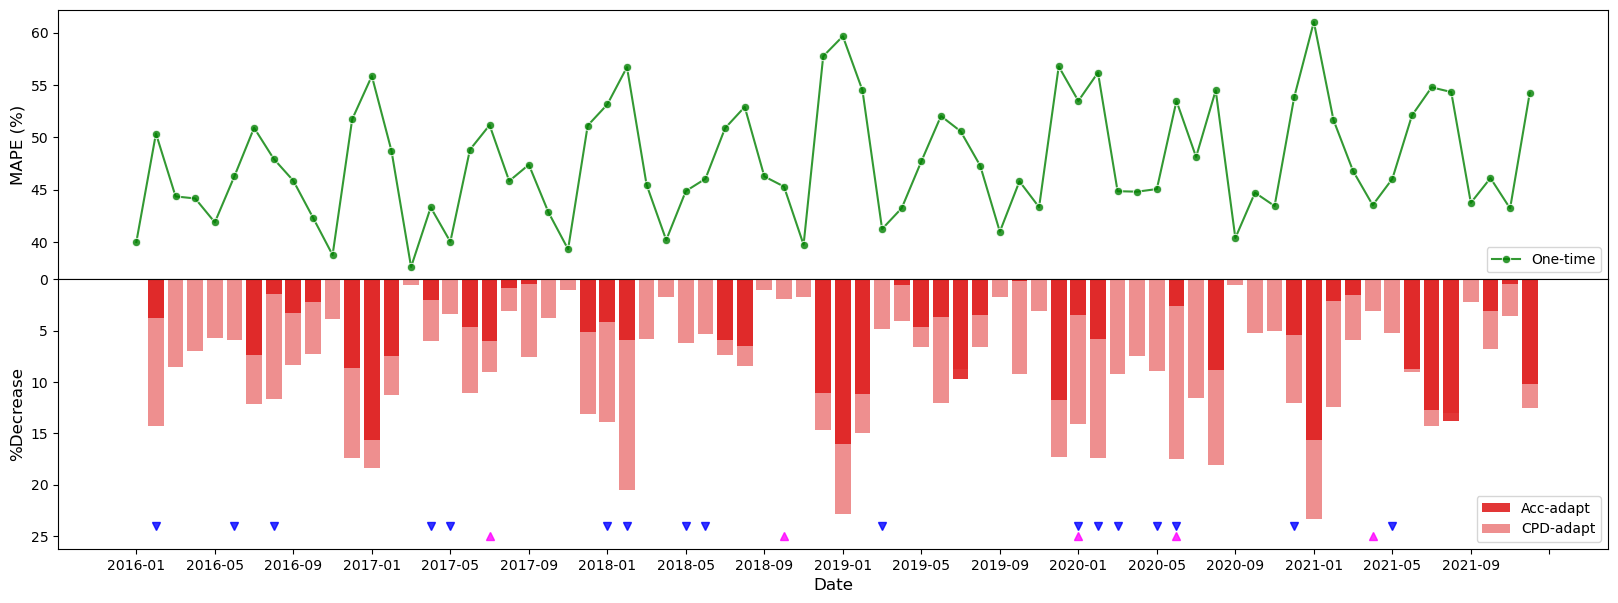

In [3927]:
ax1 = sns.set_style(style=None, rc=None )
ax2 = sns.set_style(style=None, rc=None )
sns.set_palette("husl")
#fig, ax1 = plt.subplots(figsize=(12,6))
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20, 7), sharex=True, gridspec_kw={'wspace': 0})

l1=sns.lineplot(data = res['one_time'], marker='o', sort = False, alpha=0.8, color='green', ax=ax1, label='One-time')

# ax2.plot_date(DurationsByFreq.groups.keys(), DurationsByFreq.mean(), '-b', color="black",linewidth=1)
# ax2.plot_date(DurationsByFreq.groups.keys(), DurationsByFreq.mean(), color="red")

l2=sns.barplot(data = res, x='date', y='Diff_acc_one', alpha=0.9,color='red', ax=ax2, label='Acc-adapt')
l3=sns.barplot(data = res, x='date', y='Diff_cdp_one', alpha=0.5,color='red', ax=ax2, label='CPD-adapt')

ax2.invert_yaxis()
plt.subplots_adjust(hspace=.0)
plt.setp(ax1.get_xticklabels(), visible=False)
#ax2.xaxis.set_major_locator(mdates.MonthLocator())
#ax1.set_ylim(0,65)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(4))
ax2.set_ylabel('%Decrease', fontsize=12)
ax1.set_ylabel('MAPE (%)', fontsize=12)
ax2.set_xlabel('Date',fontsize=12)
ax1.legend(loc='lower right')
ax2.legend(loc='lower right')

plt.plot(retrain_acc, [24 for _ in range(len(retrain_acc))], 'go', color='blue', alpha=0.8, marker='v')
plt.plot(retrain_cpd, [25 for _ in range(len(retrain_cpd))], 'go', color='magenta', alpha=0.8, marker='^')

plt.savefig('MAPE comparison result.png', dpi=300)

In [6836]:
datelist[24]

Timestamp('2017-01-31 00:00:00', freq='M')

In [8101]:
vol = pd.read_excel(dir+'Incident Duration Statistics.xlsx', sheet_name='BTVolume')
vol=vol.rename(columns={'Unnamed: 0':'Year'})
vol

,Year,1,2,3,4,5,6,7,8,9,10,11,12
0,2015,8403740,7912951,9246617,9657045,10250813,10037382,10417186,10621922,9698285,10053023,9660462,9987341
1,2016,8612839,8681847,9880972,9770105,10326501,10262559,10578762,10734982,9966761,10143540,9785758,10026745
2,2017,9102194,8447144,9433660,9963360,10333133,10362065,10652072,10805326,10071893,10295314,9897686,10030544
3,2018,9016136,8579978,9604862,9946150,10490475,10521977,10690758,10870416,10033180,10379394,9850756,10273647
4,2019,9242101,8668935,10002610,10099256,10652570,10583879,10752658,10976484,10289889,10484799,10143711,10330784
5,2020,9577275,9284312,7235171,3964954,6156299,7825245,9012497,9471609,9111973,9309861,8503142,8376771
6,2021,8259620,7034044,9248161,9385617,10157245,10371256,10685297,10651940,9932420,10391210,10037597,9898907


In [8105]:
vol_list = []
for index, row in vol.iterrows():
    vol_list.append(row[1:])
vol_list = pd.concat(vol_list, axis=0)
vol_list

1      8403740
2      7912951
3      9246617
4      9657045
5     10250813
        ...   
8     10651940
9      9932420
10    10391210
11    10037597
12     9898907
Length: 84, dtype: int64

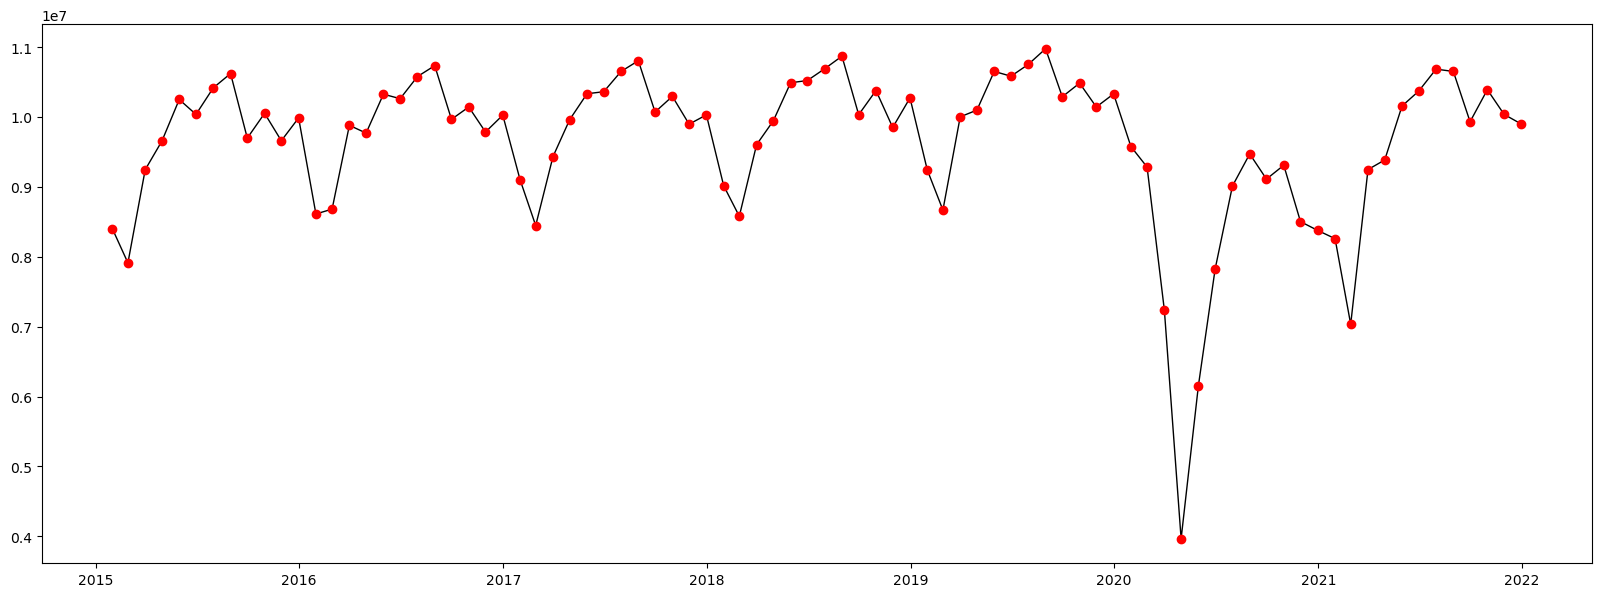

In [8118]:
vol_df = pd.DataFrame({'date': datelist, 'Volume': vol_list})
vol_df
fig,ax = plt.subplots(figsize=(20, 7))
ax.plot_date(DurationsByFreq.groups.keys(), vol_df['Volume'], '-b', color="black",linewidth=1)
ax.plot_date(DurationsByFreq.groups.keys(), vol_df['Volume'], color="red")

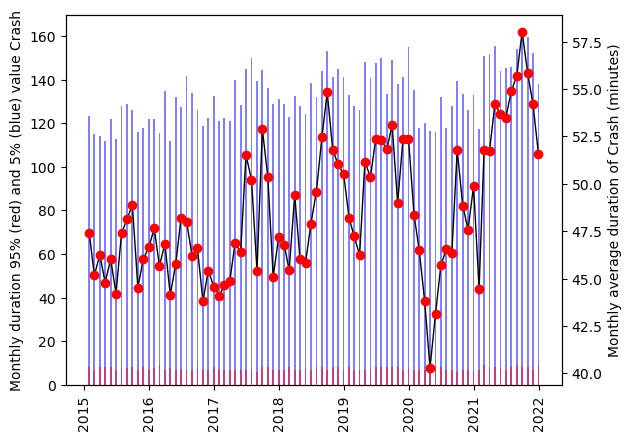

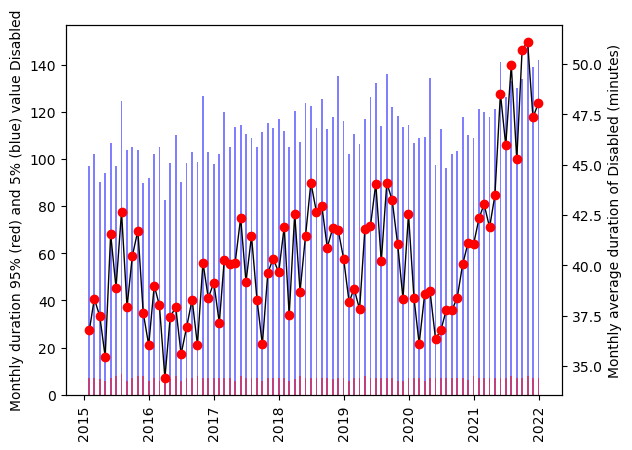

In [10572]:
DurationsByFreq_crash = timeseries_analysis_mean(data, 'Crash','1M',quantile=1)
DurationsByFreq_disable = timeseries_analysis_mean(data, 'Disabled','1M',quantile=1)

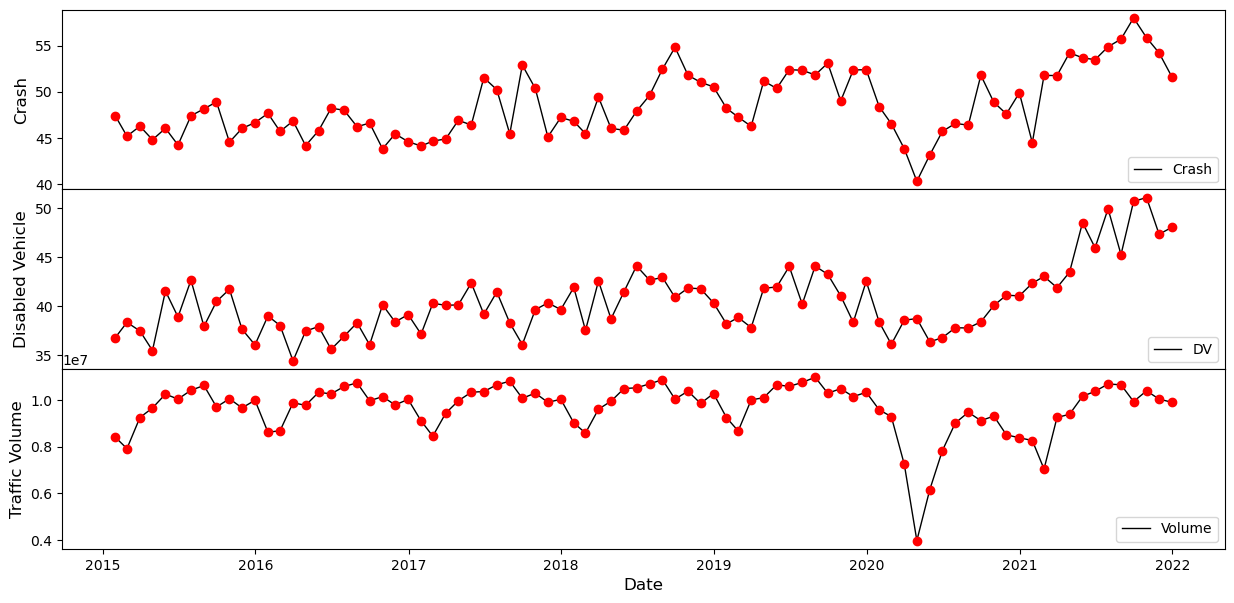

In [10574]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True, gridspec_kw={'wspace': 0})
ax1.plot_date(DurationsByFreq_crash.groups.keys(), DurationsByFreq_crash.mean(), '-b', color="black",linewidth=1, label='Crash')
ax1.plot_date(DurationsByFreq_crash.groups.keys(), DurationsByFreq_crash.mean(), color="red")
ax2.plot_date(DurationsByFreq_disable.groups.keys(), DurationsByFreq_disable.mean(), '-b', color="black",linewidth=1, label='DV')
ax2.plot_date(DurationsByFreq_disable.groups.keys(), DurationsByFreq_disable.mean(), color="red")
ax3.plot_date(DurationsByFreq_crash.groups.keys(), vol_df['Volume'], '-b', color="black",linewidth=1, label='Volume')
ax3.plot_date(DurationsByFreq_crash.groups.keys(), vol_df['Volume'], color="red")
plt.subplots_adjust(hspace=.0)
ax1.set_ylabel('Crash', fontsize=12)
ax2.set_ylabel('Disabled Vehicle', fontsize=12)
ax3.set_ylabel('Traffic Volume', fontsize=12)
ax3.set_xlabel('Date',fontsize=12)
ax1.legend(loc='lower right')
ax2.legend(loc='lower right')
ax3.legend(loc='lower right')
# xcoords = result
# for xc in xcoords[:-1]:
#     ax1.axvline(x=datelist[xc],color='blue', linewidth=1, linestyle='--')
#     ax2.axvline(x=datelist[xc],color='blue', linewidth=1, linestyle='--')
#     ax3.axvline(x=datelist[xc],color='blue', linewidth=1, linestyle='--')
#fig.savefig('CPD_Seasonal_Trend_Disable result.png', dpi=300)